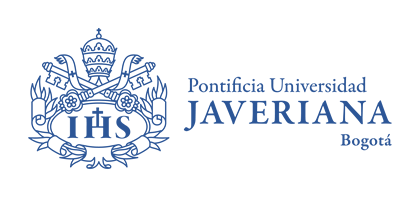

# **Proyecto 1**
 
## Machine Learning Operations (MLOps)
 
Cristian Díaz Álvarez - 036893_2510
 
### Integrantes Grupo_5:
 
*   Jorge Ardila
*   Julián Lucena
*   Juan Gabriel Sarmiento

# 2.1 Cargar la base de datos

En esta sección cargamos la base de datos a partir del código suministrado en el enunciado del proyecto y lo importamos como un dataframe para la selección de características en la siguiente sección

In [1]:
import os  
import requests
import tensorflow as tf

## Download the dataset
# Directory of the raw data files
_data_root = '/app/raw_data' 

# Path to the raw training data
_data_filepath = os.path.join(_data_root, 'covertype_train.csv')

# Download data
os.makedirs(_data_root, exist_ok=True)
if not os.path.isfile(_data_filepath):
    #https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/
    url = 'https://docs.google.com/uc?export= \
    download&confirm={{VALUE}}&id=1lVF1BCWLH4eXXV_YOJzjR7xZjj-wAGj9'
    r = requests.get(url, allow_redirects=True, stream=True)
    open(_data_filepath, 'wb').write(r.content)

2025-03-04 15:02:18.230234: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-04 15:02:18.283220: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-04 15:02:18.527652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 15:02:18.527699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 15:02:18.572397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import pandas as pd
df = pd.read_csv("/app/raw_data/covertype_train.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2991,119,7,67,11,1015,233,234,133,1570,Commanche,C7202,1
1,2876,3,18,485,71,2495,192,202,144,1557,Commanche,C7757,1
2,3171,315,2,277,9,4374,213,237,162,1052,Rawah,C7745,0
3,3087,342,13,190,31,4774,193,221,166,752,Rawah,C7745,0
4,2835,158,10,212,41,3596,231,242,141,3280,Rawah,C4744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116198,3150,220,16,285,47,2275,200,253,187,866,Commanche,C7756,1
116199,3125,47,13,234,2,2430,224,212,120,1426,Rawah,C7745,0
116200,3166,152,11,67,0,1275,234,240,136,2404,Rawah,C7202,0
116201,3154,285,14,738,46,6012,181,239,198,1320,Rawah,C7745,1


# 3. Selección de Características
En esta sección realizamos la selección de características utilizando SelectKBest para puntuar las features más relevantes frente a la variable objetivo y eliminando las menos relevantes para crear el dataset limpio que se usará en la siguientes secciones

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separar variables numéricas y la variable objetivo
X = df[['Elevation', 'Aspect', 'Slope', 
        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 
        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
y = df['Cover_Type']

# Aplicar SelectKBest con ANOVA F-value
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Ver los puntajes de cada feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                              Feature         Score
0                           Elevation  31087.079657
5     Horizontal_Distance_To_Roadways   2050.314700
2                               Slope   1559.369722
9  Horizontal_Distance_To_Fire_Points   1452.737911
6                       Hillshade_9am    643.862634
7                      Hillshade_Noon    595.275348
3    Horizontal_Distance_To_Hydrology    488.221292
4      Vertical_Distance_To_Hydrology    241.029561
8                       Hillshade_3pm    190.497164
1                              Aspect     88.987497


In [4]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Convertir las variables categóricas a valores numéricos
df_encoded = df.copy()
df_encoded['Wilderness_Area'] = LabelEncoder().fit_transform(df_encoded['Wilderness_Area'])
df_encoded['Soil_Type'] = LabelEncoder().fit_transform(df_encoded['Soil_Type'])

# Definir las variables categóricas para evaluar
X_cat = df_encoded[['Wilderness_Area', 'Soil_Type']]
y = df_encoded['Cover_Type']

# Aplicar SelectKBest con Chi-cuadrado
selector_cat = SelectKBest(score_func=chi2, k='all')
X_new_cat = selector_cat.fit_transform(X_cat, y)

# Mostrar los puntajes
feature_scores_cat = pd.DataFrame({'Feature': X_cat.columns, 'Score': selector_cat.scores_})
feature_scores_cat = feature_scores_cat.sort_values(by='Score', ascending=False)
print(feature_scores_cat)

           Feature          Score
1        Soil_Type  184062.301846
0  Wilderness_Area   15307.164543


In [5]:
# Definir las columnas finales
final_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area','Soil_Type' ,'Cover_Type']

# Crear el nuevo dataframe con las características seleccionadas
df_final = df[final_features]

output_dir = "/app/data_cleaned"
os.makedirs(output_dir, exist_ok=True)

# Guardar el nuevo dataset con las características seleccionadas
df_final.to_csv("/app/data_cleaned/covertype_train_selected.csv", index=False)

print("Dataset final guardado con las características seleccionadas.")

Dataset final guardado con las características seleccionadas.


# 4.1 Contexto Interactivo
En esta sección configuramos el contexto interactivo

In [6]:
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

# Definir la ruta donde se guardará la metadata del pipeline
_pipeline_root = '/app/pipeline/'

# Crear el contexto interactivo
context = InteractiveContext(pipeline_root=_pipeline_root)

print("Contexto interactivo configurado correctamente.")

Contexto interactivo configurado correctamente.


# 4.2 Generando Ejemplos
En esta sección generamos los ejemplos con CsvExampleGen a partir del dataset limpio que creamos anteriormente

In [7]:
from tfx.components import CsvExampleGen

# Ruta al directorio que contiene el archivo CSV
_data_root = "/app/data_cleaned"

# Crear el componente ExampleGen
example_gen = CsvExampleGen(input_base=_data_root)

# Ejecutar el componente en el contexto interactivo
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# 4.3 Generar Estadísticas
En esta sección generamos las primeras estadísticas descriptivas utilizando StatisticsGen a partir de los ejemplos generados 

In [8]:
from tfx.components import StatisticsGen

# Crear el componente StatisticsGen
statistics_gen = StatisticsGen(
    examples=example_gen.outputs['examples']
)

context.run(statistics_gen)

ExecutionResult(
    component_id: StatisticsGen
    execution_id: 2
    outputs:
        statistics: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=StatisticsGen, output_key=statistics, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [9]:
context.show(statistics_gen.outputs['statistics'])

# 4.4 Inferir el Esquema
En esta sección inferimos el esquema de los datos a partir de las estadísticas generadas anteriormente

In [10]:
from tfx.components import SchemaGen

# Crear el componente SchemaGen
schema_gen = SchemaGen(
    statistics=statistics_gen.outputs['statistics']
)

# Ejecutar el componente en el contexto
context.run(schema_gen)

ExecutionResult(
    component_id: SchemaGen
    execution_id: 3
    outputs:
        schema: OutputChannel(artifact_type=Schema, producer_component_id=SchemaGen, output_key=schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [11]:
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'Cover_Type',INT,required,,-
'Elevation',INT,required,,-
'Hillshade_9am',INT,required,,-
'Hillshade_Noon',INT,required,,-
'Horizontal_Distance_To_Fire_Points',INT,required,,-
'Horizontal_Distance_To_Hydrology',INT,required,,-
'Horizontal_Distance_To_Roadways',INT,required,,-
'Slope',INT,required,,-
'Soil_Type',STRING,required,,'Soil_Type'


,Values
Domain,
'Soil_Type',"'C2702', 'C2703', 'C2704', 'C2705', 'C2706', 'C2717', 'C3501', 'C3502', 'C4201', 'C4703', 'C4704', 'C4744', 'C4758', 'C5101', 'C6101', 'C6102', 'C6731', 'C7101', 'C7102', 'C7103', 'C7201', 'C7202', 'C7700', 'C7701', 'C7702', 'C7709', 'C7710', 'C7745', 'C7746', 'C7755', 'C7756', 'C7757', 'C7790', 'C8703', 'C8707', 'C8708', 'C8771', 'C8772', 'C8776', 'C5151'"
'Wilderness_Area',"'Cache', 'Commanche', 'Neota', 'Rawah'"


# 4.5 Curando el Esquema
En esta sección curamos el esquema, agregando los dominios a las variables númericas con los rangos estimados gracias a las estadísticas obtenidas anteriormente, marcando la variable objetivo como una variable categórica y guardando el nuevo esquema con las correcciones 

In [12]:
import tensorflow_data_validation as tfdv

# Cargar el esquema generado por SchemaGen
schema = tfdv.load_schema_text(schema_gen.outputs['schema'].get()[0].uri + "/schema.pbtxt")

# Mostrar el esquema antes de modificarlo
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Cover_Type',INT,required,,-
'Elevation',INT,required,,-
'Hillshade_9am',INT,required,,-
'Hillshade_Noon',INT,required,,-
'Horizontal_Distance_To_Fire_Points',INT,required,,-
'Horizontal_Distance_To_Hydrology',INT,required,,-
'Horizontal_Distance_To_Roadways',INT,required,,-
'Slope',INT,required,,-
'Soil_Type',STRING,required,,'Soil_Type'


,Values
Domain,
'Soil_Type',"'C2702', 'C2703', 'C2704', 'C2705', 'C2706', 'C2717', 'C3501', 'C3502', 'C4201', 'C4703', 'C4704', 'C4744', 'C4758', 'C5101', 'C6101', 'C6102', 'C6731', 'C7101', 'C7102', 'C7103', 'C7201', 'C7202', 'C7700', 'C7701', 'C7702', 'C7709', 'C7710', 'C7745', 'C7746', 'C7755', 'C7756', 'C7757', 'C7790', 'C8703', 'C8707', 'C8708', 'C8771', 'C8772', 'C8776', 'C5151'"
'Wilderness_Area',"'Cache', 'Commanche', 'Neota', 'Rawah'"


In [13]:
from tensorflow_metadata.proto.v0 import schema_pb2

# Función para asignar rangos a variables INT
def set_int_domain(schema, feature_name, min_val, max_val):
    for feature in schema.feature:
        if feature.name == feature_name:
            feature.type = schema_pb2.FeatureType.INT
            feature.int_domain.CopyFrom(schema_pb2.IntDomain(min=min_val, max=max_val))

# Asignar dominios a todas las variables numéricas
set_int_domain(schema, 'Elevation', 1860, 3850)
set_int_domain(schema, 'Hillshade_9am', 0, 255)
set_int_domain(schema, 'Hillshade_Noon', 0, 255)
set_int_domain(schema, 'Horizontal_Distance_To_Fire_Points', 0, 7170)
set_int_domain(schema, 'Horizontal_Distance_To_Hydrology', 0, 1372)
set_int_domain(schema, 'Horizontal_Distance_To_Roadways', 0, 7117)
set_int_domain(schema, 'Slope', 0, 67)
set_int_domain(schema, 'Vertical_Distance_To_Hydrology', -157, 600)

# Marcar Cover_Type como categórico
for feature in schema.feature:
    if feature.name == 'Cover_Type':
        feature.type = schema_pb2.FeatureType.INT  
        feature.int_domain.CopyFrom(schema_pb2.IntDomain(min=0, max=6)) 
        feature.annotation.tag.append('CATEGORY')  

# Guardar el esquema actualizado
tfdv.write_schema_text(schema, schema_gen.outputs['schema'].get()[0].uri + "/schema.pbtxt")

# Mostrar el esquema actualizado
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Cover_Type',INT,required,,min: 0; max: 6
'Elevation',INT,required,,min: 1860; max: 3850
'Hillshade_9am',INT,required,,min: 0; max: 255
'Hillshade_Noon',INT,required,,min: 0; max: 255
'Horizontal_Distance_To_Fire_Points',INT,required,,min: 0; max: 7170
'Horizontal_Distance_To_Hydrology',INT,required,,min: 0; max: 1372
'Horizontal_Distance_To_Roadways',INT,required,,min: 0; max: 7117
'Slope',INT,required,,min: 0; max: 67
'Soil_Type',STRING,required,,'Soil_Type'


,Values
Domain,
'Soil_Type',"'C2702', 'C2703', 'C2704', 'C2705', 'C2706', 'C2717', 'C3501', 'C3502', 'C4201', 'C4703', 'C4704', 'C4744', 'C4758', 'C5101', 'C6101', 'C6102', 'C6731', 'C7101', 'C7102', 'C7103', 'C7201', 'C7202', 'C7700', 'C7701', 'C7702', 'C7709', 'C7710', 'C7745', 'C7746', 'C7755', 'C7756', 'C7757', 'C7790', 'C8703', 'C8707', 'C8708', 'C8771', 'C8772', 'C8776', 'C5151'"
'Wilderness_Area',"'Cache', 'Commanche', 'Neota', 'Rawah'"


# 4.6 Entornos de Esquemas
En esta sección generamos los entornos de esquema de entrenamiento y servicio, para evitar anomalías con el conjunto de datos de servicio, ya que estos no incluyen la etiqueta. Adicionalmente, corregimos unas anomalías generadas por los rangos que definimos anteriormente, expandiéndolos un poco más 

In [14]:
# Cargar los datos de entrenamiento en un DataFrame
df_train = pd.read_csv("/app/data_cleaned/covertype_train_selected.csv")

# Simular datos de servicio eliminando la columna de la etiqueta
df_serving = df_train.drop(columns=['Cover_Type'])

# Guardar los datos simulados como CSV
serving_data_path = "/app/data_cleaned/covertype_serving_data.csv"
df_serving.to_csv(serving_data_path, index=False)

# Tomar los datos de servicio para validación
serving_stats = tfdv.generate_statistics_from_csv(serving_data_path)

# Validar los datos de servicio contra el esquema definido
serving_anomalies = tfdv.validate_statistics(serving_stats, schema)

# Mostrar las anomalías 
tfdv.display_anomalies(serving_anomalies)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


,Anomaly short description,Anomaly long description
Feature name,,
'Vertical_Distance_To_Hydrology',Out-of-range values,Unexpectedly small value: -166.
'Cover_Type',Column dropped,Column is completely missing
'Elevation',Out-of-range values,Unexpectedly large value: 3858.
'Horizontal_Distance_To_Hydrology',Out-of-range values,Unexpectedly large value: 1397.


In [15]:
# Ajustar rangos en el esquema original para corregir anomalías
tfdv.get_feature(schema, 'Elevation').int_domain.min = 1850
tfdv.get_feature(schema, 'Elevation').int_domain.max = 3860

tfdv.get_feature(schema, 'Vertical_Distance_To_Hydrology').int_domain.min = -170
tfdv.get_feature(schema, 'Vertical_Distance_To_Hydrology').int_domain.max = 600

tfdv.get_feature(schema, 'Horizontal_Distance_To_Hydrology').int_domain.min = 0
tfdv.get_feature(schema, 'Horizontal_Distance_To_Hydrology').int_domain.max = 1400

# Guardar el esquema corregido en el archivo original
tfdv.write_schema_text(schema, "schema.pbtxt")

In [16]:
# Volver a validar los datos de servicio con el esquema corregido
serving_anomalies_fixed = tfdv.validate_statistics(serving_stats, schema)

# Revisar si las anomalías desaparecieron
tfdv.display_anomalies(serving_anomalies_fixed)

,Anomaly short description,Anomaly long description
Feature name,,
'Cover_Type',Column dropped,Column is completely missing


In [17]:
# Definir los entornos en el esquema
schema.default_environment.append('TRAINING')
schema.default_environment.append('SERVING')

# Excluir 'Cover_Type' del entorno de SERVING
tfdv.get_feature(schema, 'Cover_Type').not_in_environment.append("SERVING")

# Guardar el esquema actualizado en el mismo archivo original
tfdv.write_schema_text(schema, "schema.pbtxt")

# Mostrar el esquema actualizado
schema

feature {
  name: "Cover_Type"
  type: INT
  int_domain {
    min: 0
    max: 6
  }
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  annotation {
    tag: "CATEGORY"
  }
  not_in_environment: "SERVING"
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Elevation"
  type: INT
  int_domain {
    min: 1850
    max: 3860
  }
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Hillshade_9am"
  type: INT
  int_domain {
    min: 0
    max: 255
  }
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Hillshade_Noon"
  type: INT
  int_domain {
    min: 0
    max: 255
  }
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Horizontal_Distance_To_Fire_Points"
  type: INT
  int_domain {
    min: 0
    max: 7170
  }
  presence {
    min_fraction: 1.0
    min_count: 1
  }
  

In [18]:
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Cover_Type',INT,required,,min: 0; max: 6
'Elevation',INT,required,,min: 1850; max: 3860
'Hillshade_9am',INT,required,,min: 0; max: 255
'Hillshade_Noon',INT,required,,min: 0; max: 255
'Horizontal_Distance_To_Fire_Points',INT,required,,min: 0; max: 7170
'Horizontal_Distance_To_Hydrology',INT,required,,min: 0; max: 1400
'Horizontal_Distance_To_Roadways',INT,required,,min: 0; max: 7117
'Slope',INT,required,,min: 0; max: 67
'Soil_Type',STRING,required,,'Soil_Type'


,Values
Domain,
'Soil_Type',"'C2702', 'C2703', 'C2704', 'C2705', 'C2706', 'C2717', 'C3501', 'C3502', 'C4201', 'C4703', 'C4704', 'C4744', 'C4758', 'C5101', 'C6101', 'C6102', 'C6731', 'C7101', 'C7102', 'C7103', 'C7201', 'C7202', 'C7700', 'C7701', 'C7702', 'C7709', 'C7710', 'C7745', 'C7746', 'C7755', 'C7756', 'C7757', 'C7790', 'C8703', 'C8707', 'C8708', 'C8771', 'C8772', 'C8776', 'C5151'"
'Wilderness_Area',"'Cache', 'Commanche', 'Neota', 'Rawah'"


# 4.7 Nuevas Estadísticas con el Esquema Actualizado
En esta sección generamos las nuevas estadísticas a partir del esquema actualizado, utilizando la función ImportSchemaGen

In [19]:
from tfx.v1.components import ImportSchemaGen

# Definir la ruta al esquema corregido
schema_path = "schema.pbtxt"

# Crear el artefacto de esquema importado
schema_gen = ImportSchemaGen(schema_file=schema_path)

# Ejecutar el componente en el contexto interactivo
context.run(schema_gen)

# Ver los resultados
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'Cover_Type',INT,required,,min: 0; max: 6
'Elevation',INT,required,,min: 1850; max: 3860
'Hillshade_9am',INT,required,,min: 0; max: 255
'Hillshade_Noon',INT,required,,min: 0; max: 255
'Horizontal_Distance_To_Fire_Points',INT,required,,min: 0; max: 7170
'Horizontal_Distance_To_Hydrology',INT,required,,min: 0; max: 1400
'Horizontal_Distance_To_Roadways',INT,required,,min: 0; max: 7117
'Slope',INT,required,,min: 0; max: 67
'Soil_Type',STRING,required,,'Soil_Type'


,Values
Domain,
'Soil_Type',"'C2702', 'C2703', 'C2704', 'C2705', 'C2706', 'C2717', 'C3501', 'C3502', 'C4201', 'C4703', 'C4704', 'C4744', 'C4758', 'C5101', 'C6101', 'C6102', 'C6731', 'C7101', 'C7102', 'C7103', 'C7201', 'C7202', 'C7700', 'C7701', 'C7702', 'C7709', 'C7710', 'C7745', 'C7746', 'C7755', 'C7756', 'C7757', 'C7790', 'C8703', 'C8707', 'C8708', 'C8771', 'C8772', 'C8776', 'C5151'"
'Wilderness_Area',"'Cache', 'Commanche', 'Neota', 'Rawah'"


In [20]:
# Volver a generar estadísticas usando el esquema actualizado
statistics_gen_updated = StatisticsGen(
    examples=example_gen.outputs['examples'],
    schema=schema_gen.outputs['schema'] 
)

# Ejecutar StatisticsGen con el esquema corregido
context.run(statistics_gen_updated)

# Mostrar las estadísticas actualizadas
context.show(statistics_gen_updated.outputs['statistics'])

# 4.8 Comprobar Anomalías
En esta sección comprobamos por última vez que no hayan anomalías una vez creados los dos entornos de los esquemas

In [21]:
from tfx.components import ExampleValidator

# Crear el componente ExampleValidator
example_validator = ExampleValidator(
    statistics=statistics_gen_updated.outputs['statistics'],
    schema=schema_gen.outputs['schema']
)

# Ejecutar ExampleValidator
context.run(example_validator)

# Mostrar anomalías detectadas
context.show(example_validator.outputs['anomalies'])

# 4.9 y 4.10 Ingeniería de Características
En esta sección creamos el archivo python de transformación de las variables, para escalar con Z-score las variables númericas, mapear las variables categóricas a índices enteros, transformar la variable objetivo y además generar nuevos nombres para distinguir que ya son las variables transformadas

In [22]:
# Crear la carpeta transformation_files para almacenar los .py
os.makedirs("/app/transformation_files", exist_ok=True)

In [23]:
# Crear archivo combinado para las transformaciones
with open('/app/transformation_files/tfx_transform.py', 'w') as f:
    f.write("""
import tensorflow_transform as tft

# Definir las características numéricas y categóricas
NUMERIC_FEATURES = [
    "Elevation", "Hillshade_9am", "Hillshade_Noon", "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Slope",
    "Vertical_Distance_To_Hydrology"
]

CATEGORICAL_FEATURES = ["Soil_Type", "Wilderness_Area"]

LABEL_KEY = "Cover_Type"

# Función para renombrar las características transformadas
def transformed_name(key):
    return key + "_xf"

# Función de preprocesamiento para TFX
def preprocessing_fn(inputs):
    outputs = {}
    
    # Aplicar Z-score a las características numéricas
    for feature in NUMERIC_FEATURES:
        outputs[transformed_name(feature)] = tft.scale_to_z_score(inputs[feature])
    
    # Mapear variables categóricas a índices enteros
    for feature in CATEGORICAL_FEATURES:
        outputs[transformed_name(feature)] = tft.compute_and_apply_vocabulary(inputs[feature])
    
    # Transformar la variable objetivo
    outputs[transformed_name(LABEL_KEY)] = tft.compute_and_apply_vocabulary(inputs[LABEL_KEY])

    return outputs
""")

In [24]:
!cat /app/transformation_files/tfx_transform.py


import tensorflow_transform as tft

# Definir las características numéricas y categóricas
NUMERIC_FEATURES = [
    "Elevation", "Hillshade_9am", "Hillshade_Noon", "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Slope",
    "Vertical_Distance_To_Hydrology"
]

CATEGORICAL_FEATURES = ["Soil_Type", "Wilderness_Area"]

LABEL_KEY = "Cover_Type"

# Función para renombrar las características transformadas
def transformed_name(key):
    return key + "_xf"

# Función de preprocesamiento para TFX
def preprocessing_fn(inputs):
    outputs = {}
    
    # Aplicar Z-score a las características numéricas
    for feature in NUMERIC_FEATURES:
        outputs[transformed_name(feature)] = tft.scale_to_z_score(inputs[feature])
    
    # Mapear variables categóricas a índices enteros
    for feature in CATEGORICAL_FEATURES:
        outputs[transformed_name(feature)] = tft.compute_and_apply_vocabulary(inputs[feature])
    
    # Transformar

# 4.11 Transformar los Datos
En esta sección utilizamos la función Transform de tensorflow para aplicar las transformaciones específicadas en el python anterior al conjunto de ejemplos, mostramos el esquema para comprobar las transformaciones hechas y además revisamos los primeros registros para comprobar que las transformaciones se hicieron de manera exitosa 

In [25]:
from tfx.v1.components import Transform

# Definir la ruta del archivo de transformación
TRANSFORM_MODULE_PATH = os.path.abspath("/app/transformation_files/tfx_transform.py")

# Crear el componente Transform
transform = Transform(
    examples=example_gen.outputs['examples'],
    schema=schema_gen.outputs['schema'],
    module_file=TRANSFORM_MODULE_PATH
)

# Ejecutar el componente
context.run(transform)

running bdist_wheel
running build
running build_py
creating build/lib
copying tfx_transform.py -> build/lib
installing to /tmp/tmpwkh9f_j6
running install
running install_lib
copying build/lib/tfx_transform.py -> /tmp/tmpwkh9f_j6/.
running install_egg_info
running egg_info
creating tfx_user_code_Transform.egg-info
writing tfx_user_code_Transform.egg-info/PKG-INFO
writing dependency_links to tfx_user_code_Transform.egg-info/dependency_links.txt
writing top-level names to tfx_user_code_Transform.egg-info/top_level.txt
writing manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'
reading manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'
writing manifest file 'tfx_user_code_Transform.egg-info/SOURCES.txt'
Copying tfx_user_code_Transform.egg-info to /tmp/tmpwkh9f_j6/./tfx_user_code_Transform-0.0+dd3bce238b2b4d629921f602a2405d266c3fa10aadccb39a4514f648b616efba-py3.10.egg-info
running install_scripts
creating /tmp/tmpwkh9f_j6/tfx_user_code_transform-0.0+dd3bce238b2b4d629921f

/app/.venv/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:79: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


Processing /app/pipeline/_wheels/tfx_user_code_transform-0.0+dd3bce238b2b4d629921f602a2405d266c3fa10aadccb39a4514f648b616efba-py3-none-any.whl
Processing /app/pipeline/_wheels/tfx_user_code_transform-0.0+dd3bce238b2b4d629921f602a2405d266c3fa10aadccb39a4514f648b616efba-py3-none-any.whl
Processing /app/pipeline/_wheels/tfx_user_code_transform-0.0+dd3bce238b2b4d629921f602a2405d266c3fa10aadccb39a4514f648b616efba-py3-none-any.whl


INFO:tensorflow:Assets written to: /app/pipeline/Transform/transform_graph/7/.temp_path/tftransform_tmp/495bf9063653481bb1e4954d80426a5c/assets


INFO:tensorflow:Assets written to: /app/pipeline/Transform/transform_graph/7/.temp_path/tftransform_tmp/495bf9063653481bb1e4954d80426a5c/assets


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:Assets written to: /app/pipeline/Transform/transform_graph/7/.temp_path/tftransform_tmp/3f0c75b8716d42d0862e1615d6d32c13/assets


INFO:tensorflow:Assets written to: /app/pipeline/Transform/transform_graph/7/.temp_path/tftransform_tmp/3f0c75b8716d42d0862e1615d6d32c13/assets


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_text is not available.


INFO:tensorflow:tensorflow_text is not available.


ExecutionResult(
    component_id: Transform
    execution_id: 7
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [26]:
# Mostrar el esquema transformado
context.show(transform.outputs['transform_graph'])

In [27]:
from tensorflow_transform.beam.tft_beam_io import transform_fn_io

# Obtener la URI donde se almacenó la función de transformación
transform_output_uri = transform.outputs['transform_graph'].get()[0].uri
transform_schema_path = os.path.join(transform_output_uri, transform_fn_io.TRANSFORMED_METADATA_DIR, "schema.pbtxt")

# Leer el esquema de transformación
with open(transform_schema_path, "r") as f:
    schema_content = f.read()

# Mostrar el esquema de transformación
print(schema_content)

feature {
  name: "Cover_Type_xf"
  type: INT
  int_domain {
    min: -1
    max: 6
    is_categorical: true
  }
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Elevation_xf"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Hillshade_9am_xf"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Hillshade_Noon_xf"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Horizontal_Distance_To_Fire_Points_xf"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Horizontal_Distance_To_Hydrology_xf"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 1
    }
  }
}
feature {
  name: "Horizontal_Distance_To_Roadways_xf"
  type: FLOAT
  presence {
   

In [28]:
# Función para revisar los registros 
from google.protobuf.json_format import MessageToDict

def get_records(dataset, num_records):
    '''Extrae registros del dataset transformado.
    
    Args:
        dataset (TFRecordDataset): dataset guardado por Transform
        num_records (int): número de registros a visualizar
    
    Returns:
        list: registros extraídos en formato diccionario
    '''
    records = []

    for tfrecord in dataset.take(num_records):
        serialized_example = tfrecord.numpy()
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        example_dict = MessageToDict(example)
        records.append(example_dict)

    return records

In [29]:
# Obtener la URI de los ejemplos transformados
transform_uri = transform.outputs['transformed_examples'].get()[0].uri
train_uri = os.path.join(transform_uri, 'Split-train')

# Listar los archivos en la carpeta para asegurarnos de que existen
tfrecord_filenames = [os.path.join(train_uri, name) for name in os.listdir(train_uri)]
print(f"Archivos en el dataset transformado: {tfrecord_filenames}")

# Crear el dataset de TensorFlow
transformed_dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

# Extraer y mostrar 3 ejemplos transformados
sample_records_xf = get_records(transformed_dataset, 3)

import pprint
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(sample_records_xf)

Archivos en el dataset transformado: ['/app/pipeline/Transform/transformed_examples/7/Split-train/transformed_examples-00000-of-00001.gz']
[ { 'features': { 'feature': { 'Cover_Type_xf': {'int64List': {'value': ['0']}},
                               'Elevation_xf': { 'floatList': { 'value': [ 0.11859784]}},
                               'Hillshade_9am_xf': { 'floatList': { 'value': [ 0.7793003]}},
                               'Hillshade_Noon_xf': { 'floatList': { 'value': [ 0.537521]}},
                               'Horizontal_Distance_To_Fire_Points_xf': { 'floatList': { 'value': [ -0.30698875]}},
                               'Horizontal_Distance_To_Hydrology_xf': { 'floatList': { 'value': [ -0.94958204]}},
                               'Horizontal_Distance_To_Roadways_xf': { 'floatList': { 'value': [ -0.8517542]}},
                               'Slope_xf': { 'floatList': { 'value': [ -0.94944674]}},
                               'Soil_Type_xf': {'int64List': {'value': ['1'

# 5. Metadata
En esta sección importamos las funciones auxiliares del archivo utils.py suministrado en el enunciado del proyecto y realizamos la conexión a la base de datos del pipeline

In [30]:
# Funciones auxiliares de utils.py
def display_types(types):
    # Helper function to render dataframes for the artifact and execution types
    table = {'id': [], 'name': []}
    for a_type in types:
        table['id'].append(a_type.id)
        table['name'].append(a_type.name)
    return pd.DataFrame(data=table)

def display_artifacts(store, artifacts, base_dir):
    # Helper function to render dataframes for the input artifacts
    table = {'artifact id': [], 'type': [], 'uri': []}
    for a in artifacts:
        table['artifact id'].append(a.id)
        artifact_type = store.get_artifact_types_by_id([a.type_id])[0]
        table['type'].append(artifact_type.name)
        table['uri'].append(a.uri.replace(base_dir, './'))
    return pd.DataFrame(data=table)

def display_properties(store, node):
    # Helper function to render dataframes for artifact and execution properties
    table = {'property': [], 'value': []}
    
    for k, v in node.properties.items():
        table['property'].append(k)
        table['value'].append(
            v.string_value if v.HasField('string_value') else v.int_value)
    
    for k, v in node.custom_properties.items():
        table['property'].append(k)
        table['value'].append(
            v.string_value if v.HasField('string_value') else v.int_value)
    
    return pd.DataFrame(data=table)

In [31]:
# Conexión a la base de datos
from ml_metadata.metadata_store import metadata_store
from ml_metadata.proto import metadata_store_pb2

connection_config = metadata_store_pb2.ConnectionConfig()
connection_config.sqlite.filename_uri = "/app/pipeline/metadata.sqlite"
connection_config.sqlite.connection_mode = metadata_store_pb2.SqliteMetadataSourceConfig.READWRITE

# Intentar conectarse al almacén de metadatos
try:
    metadata_connection = metadata_store.MetadataStore(connection_config)
    print(" Conexión exitosa a ML Metadata")
except Exception as e:
    print(f" Error conectando a ML Metadata: {e}")

 Conexión exitosa a ML Metadata


# 5.1 Acceso a Artefactos Almacenados
En esta sección revisamos los tipos de artefactos almacenados en la metadata y obtenemos las propiedades del primer artefacto ExampleStatistics como ejemplo 

In [32]:
# Obtener los tipos de artefactos
artifact_types = metadata_connection.get_artifact_types()

# Mostrar los tipos de artefactos almacenados
display_types(artifact_types)

,id,name
0,14,Examples
1,16,ExampleStatistics
2,18,Schema
3,21,ExampleAnomalies
4,23,TransformGraph
5,24,TransformCache


In [33]:
# Obtener artefactos de tipo ExampleStatistics
example_statistics = metadata_connection.get_artifacts_by_type("ExampleStatistics")

# Mostrar propiedades del primer artefacto encontrado
if example_statistics:
    print("\n Propiedades del primer artefacto ExampleStatistics:")
    properties_df = display_properties(metadata_connection, example_statistics[0])
    print(properties_df)
else:
    print("No se encontraron artefactos de tipo ExampleStatistics")


 Propiedades del primer artefacto ExampleStatistics:
               property                                  value
0           split_names                      ["train", "eval"]
1                  span                                      0
2           tfx_version                                 1.15.1
3                  name  statistics:2025-03-04T15:03:00.671096
4  stats_dashboard_link                                       
5    producer_component                          StatisticsGen


# 5.2 Seguimiento de Artefactos
En esta sección definimos la función get_related_artifacts para encontrar los artefactos relacionados con un artefacto específico

In [34]:
# Función para encontrar artefactos relacionados a un artefacto en específico
def get_related_artifacts(metadata_connection, artifact_id):
    """
    Recupera los artefactos relacionados que contribuyeron a la creación de un artefacto específico.
    
    Args:
        metadata_connection: Conexión a la base de datos de metadata.
        artifact_id: ID del artefacto del cual queremos conocer sus insumos.

    Returns:
        DataFrame con los artefactos relacionados.
    """

    # Obtener eventos relacionados con el artefacto dado
    related_events = metadata_connection.get_events_by_artifact_ids([artifact_id])

    # Obtener las ejecuciones asociadas a esos eventos
    execution_ids = {event.execution_id for event in related_events}
    executions = metadata_connection.get_executions_by_id(list(execution_ids))

    # Obtener eventos de entrada de estas ejecuciones
    input_events = metadata_connection.get_events_by_execution_ids(list(execution_ids))

    # Obtener los IDs de los artefactos de entrada
    input_artifact_ids = {event.artifact_id for event in input_events if event.type == metadata_store_pb2.Event.INPUT}

    # Obtener los artefactos de entrada
    input_artifacts = metadata_connection.get_artifacts_by_id(list(input_artifact_ids))

    # Crear la salida en un DataFrame
    table = {'artifact_id': [], 'type': [], 'uri': []}
    for artifact in input_artifacts:
        artifact_type = metadata_connection.get_artifact_types_by_id([artifact.type_id])[0]
        table['artifact_id'].append(artifact.id)
        table['type'].append(artifact_type.name)
        table['uri'].append(artifact.uri.replace(".", "./"))

    return pd.DataFrame(table)

# 5.3 Obtener Artefactos Principales
Por último, en esta sección empleamos la función definida anteriormente para encontrar los artefactos relacionados con los artefactos de tipo TransformGraph

In [35]:
# Obtener artefactos de tipo TransformGraph
transform_graphs = metadata_connection.get_artifacts_by_type("TransformGraph")

if transform_graphs:
    transform_graph_id = transform_graphs[0].id 
    df_related_artifacts = get_related_artifacts(metadata_connection, transform_graph_id)
    print("Artefactos relacionados con TransformGraph")
    print(df_related_artifacts)
else:
    print("No se encontraron artefactos de tipo TransformGraph.")

Artefactos relacionados con TransformGraph
   artifact_id      type                                     uri
0            1  Examples  /app/pipeline/CsvExampleGen/examples/1
1            4    Schema  /app/pipeline/ImportSchemaGen/schema/4
